In [1]:
from numpy import mean
from numpy import std
import random
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing import image
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
from tensorflow.keras.models import load_model 

plt.rcParams['figure.figsize']=[12,8]
plt.rcParams['figure.dpi'] = 100

### Displaying 1 random image from each of the 10 classes in CIFAR-10
CIFAR-10 dataset contains 10 classes. In the below code I have iterated through the 50000 training images and saved all of them in their corresponding list. For ex : Aeroplane image is saved in airplaneList.
These lists are stored in a dictionary which is later iterated to print 10 random images, 1 from each class.

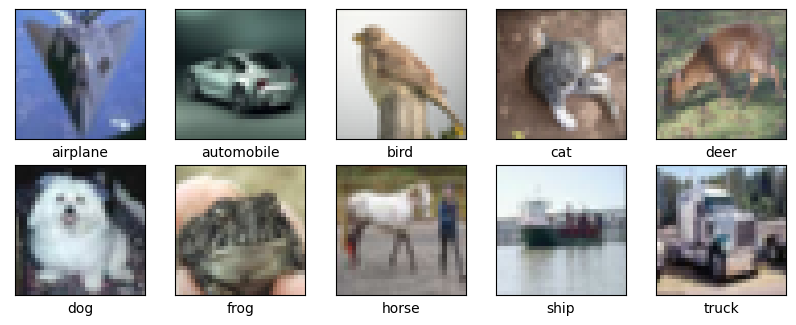

In [19]:
#Loading dataset 
(trainX, trainY), (testX, testY) = datasets.cifar10.load_data()
plt.figure(figsize=(10,10))

#intializing list to classify images in to categories based on their labels in CIFAR 10 dataset and then add to the dictionary
cifarClasses = dict()
airplaneList, automobileList, birdList, catList, deerList, dogList, frogList, horseList, shipList, truckList = list(),list(),list(),list(),list(),list(),list(),list(),list(),list()

#Iterating through all the images in training dataset i.e 50000
for i in range(50000):
    #adding to the appropriate list based on labels
    # The CIFAR labels are  arrays which is why the extra index is required
    if trainY[i][0]==0: 
        airplaneList.append(trainX[i])
    elif trainY[i][0]==1: 
        automobileList.append(trainX[i])
    elif trainY[i][0]==2: 
        birdList.append(trainX[i])
    elif trainY[i][0]==3: 
        catList.append(trainX[i])
    elif trainY[i][0]==4: 
        deerList.append(trainX[i])
    elif trainY[i][0]==5: 
        dogList.append(trainX[i])
    elif trainY[i][0]==6: 
        frogList.append(trainX[i])
    elif trainY[i][0]==7: 
        horseList.append(trainX[i])
    elif trainY[i][0]==8:  
        shipList.append(trainX[i])
    elif trainY[i][0]==9:
        truckList.append(trainX[i])
        
#Adding all the lists in to dictionary
cifarClasses['airplane'] = airplaneList
cifarClasses['automobile'] = automobileList
cifarClasses['bird'] = birdList
cifarClasses['cat'] = catList
cifarClasses['deer'] = deerList
cifarClasses['dog'] = dogList
cifarClasses['frog'] = frogList
cifarClasses['horse'] = horseList
cifarClasses['ship'] = shipList
cifarClasses['truck'] = truckList
i=0

#iterating dictionary to display 1 random image from each of the classes
for j in cifarClasses:
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(random.choice(cifarClasses.get(j)))
    plt.xlabel(j)
    i+=1
plt.show()

### Loading CIFAR-10 Dataset from keras and one hot encoding

In [4]:
def load_dataset() :
    (trainX, trainY), (testX, testY) = datasets.cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX,trainY, testX,testY

### Normalization

In [3]:
def prep_pixels(trainX,testX):
    # convert from integers to floats
    trainX = trainX.astype('float32')
    testX = testX.astype('float32')
    # normalize to range 0-1
    trainX = trainX / 255.0
    testX = testX / 255.0
    return trainX,testX

### Plotting Cross Entropy Loss and Classification Accuracy

In [2]:
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        plt.subplot(211)
        plt.title('Cross Entropy Loss')
        plt.ylabel('Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        
        # plot accuracy
        plt.subplot(212)
        plt.title('Classification Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange',label='test')
    plt.show()

### Creating a basic Classification model

In [5]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

### Setting Hyperparameters and compiling the model

In [6]:
def evaluate_model(train_images, train_labels,test_images, test_labels,model):
    histories = list()
        
    #Setting Hyperparameters
    learning_rate =0.001
    momentum = 0.9
    sgd = SGD(learning_rate, momentum)
    
    #compiling model
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels))
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    histories.append(history)
    print(test_acc)
    return histories

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 16s 317us/sample - loss: 1.8653 - accuracy: 0.3343 - val_loss: 1.6125 - val_accuracy: 0.4283
Epoch 2/10
50000/50000 [==============================] - 8s 165us/sample - loss: 1.5062 - accuracy: 0.4614 - val_loss: 1.3820 - val_accuracy: 0.5102
Epoch 3/10
50000/50000 [==============================] - 8s 169us/sample - loss: 1.3230 - accuracy: 0.5279 - val_loss: 1.3107 - val_accuracy: 0.5267
Epoch 4/10
50000/50000 [==============================] - 9s 173us/sample - loss: 1.2028 - accuracy: 0.5731 - val_loss: 1.1886 - val_accuracy: 0.5728
Epoch 5/10
50000/50000 [==============================] - 9s 174us/sample - loss: 1.1120 - accuracy: 0.6070 - val_loss: 1.1370 - val_accuracy: 0.5899
Epoch 6/10
50000/50000 [==============================] - 8s 168us/sample - loss: 1.0245 - accuracy: 0.6387 - val_loss: 1.0767 - val_accuracy: 0.6223
Epoch 7/10
50000/50000 [=========================

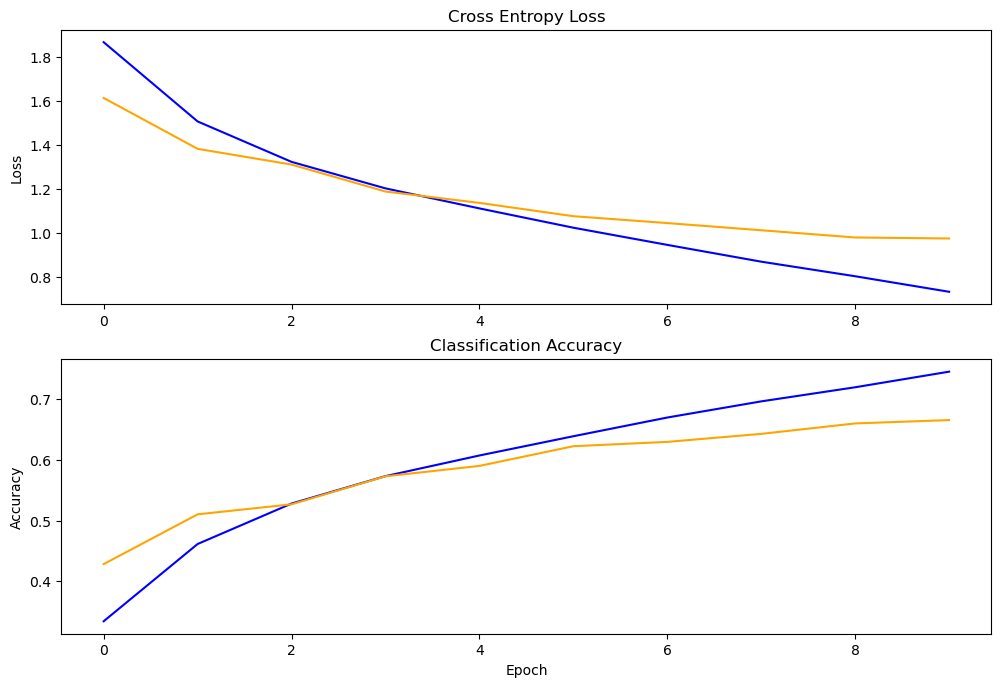

In [7]:
#loading CIFAR 10 dataset
trainX, trainY,testX, testY =load_dataset()

#preparing the data
trainX, testX = prep_pixels(trainX, testX)

#defining model
model = define_model()

#compiling model, setting hyperparameters 
histories=evaluate_model(trainX, trainY,testX, testY,model)

#reporting cross entropy loss and classification accuracy
summarize_diagnostics(histories)


### Saving basic CIFAR-10 CNN model

In [21]:
model.save('basic_cifar10_cnn.h5')

### Creating a modified classification model

In [28]:
def define_model_modified():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    return model

### Setting Hyperparameters and compiling the modified model

In [35]:
def evaluate_modified_model(train_images, train_labels,test_images, test_labels,model):
    histories = list()
    
    learning_rate = 0.001
    momentum = 0.9
    sgd = SGD(learning_rate, momentum)
    
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=30,validation_data=(test_images, test_labels))
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    histories.append(history)
    print(test_acc)
    return histories

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 15s 309us/sample - loss: 1.9375 - accuracy: 0.2808 - val_loss: 1.5804 - val_accuracy: 0.4269
Epoch 2/30
50000/50000 [==============================] - 14s 270us/sample - loss: 1.5548 - accuracy: 0.4279 - val_loss: 1.4263 - val_accuracy: 0.4872
Epoch 3/30
50000/50000 [==============================] - 13s 265us/sample - loss: 1.4057 - accuracy: 0.4896 - val_loss: 1.2541 - val_accuracy: 0.5514
Epoch 4/30
50000/50000 [==============================] - 13s 267us/sample - loss: 1.2927 - accuracy: 0.5348 - val_loss: 1.1522 - val_accuracy: 0.5916
Epoch 5/30
50000/50000 [==============================] - 13s 263us/sample - loss: 1.1944 - accuracy: 0.5716 - val_loss: 1.0577 - val_accuracy: 0.6276
Epoch 6/30
50000/50000 [==============================] - 13s 268us/sample - loss: 1.1150 - accuracy: 0.6016 - val_loss: 0.9951 - val_accuracy: 0.6479
Epoch 7/30
50000/50000 [====================

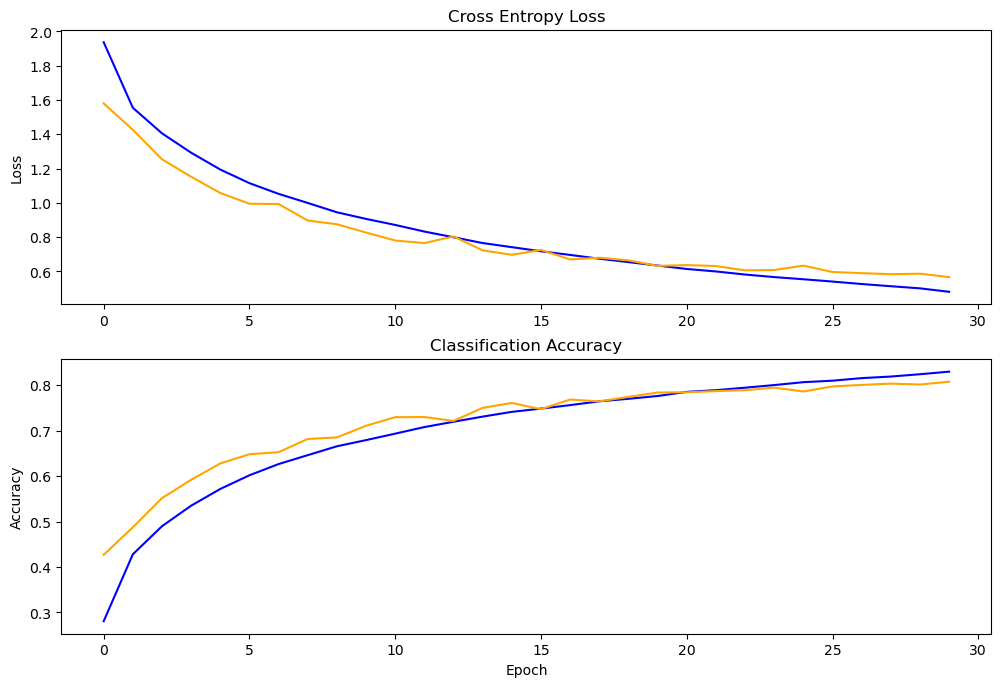

In [36]:
#loading CIFAR 10 dataset
trainX, trainY,testX, testY =load_dataset()

#preparing the data
trainX, testX = prep_pixels(trainX, testX)

#defining model
model_modified = define_model_modified()

#compiling model, setting hyperparameters 
histories_mod=evaluate_modified_model(trainX, trainY,testX, testY,model_modified)

#reporting cross entropy loss and classification accuracy
summarize_diagnostics(histories_mod)

### Saving modified CIFAR-10 CNN model

In [37]:
model_modified.save('modified_cifar10_cnn.h5')

### Implementation to predict any input image using given model

In [56]:
def predict_image(img,model) :
    
    test_image =image.img_to_array(img) 
    test_image =np.expand_dims(test_image, axis =0) 
    result = model_modified.predict(test_image) 
    
    #displaying the image sent for prediction
    plt.xticks([])
    plt.yticks([])
    plt.title("Image for prediction")
    plt.imshow(img)
    
    if result[0][0]==1: 
        return "Aeroplane" 
    elif result[0][1]==1: 
        return "Automobile"
    elif result[0][2]==1: 
        return "Bird" 
    elif result[0][3]==1: 
        return "Cat" 
    elif result[0][4]==1: 
        return "Deer"  
    elif result[0][5]==1: 
        return "Dog" 
    elif result[0][6]==1: 
        return "Frog"  
    elif result[0][7]==1: 
        return "Horse" 
    elif result[0][8]==1: 
        return "Ship"
    elif result[0][9]==1: 
        return "Truck" 
    else: 
        return "None"

### Loading the Image to predict and Loading both the models to predict the input image
I have used a random airplane image for testing in this scenario.

Prediction by Base CNN : Aeroplane
Prediction by Modified CNN : Aeroplane


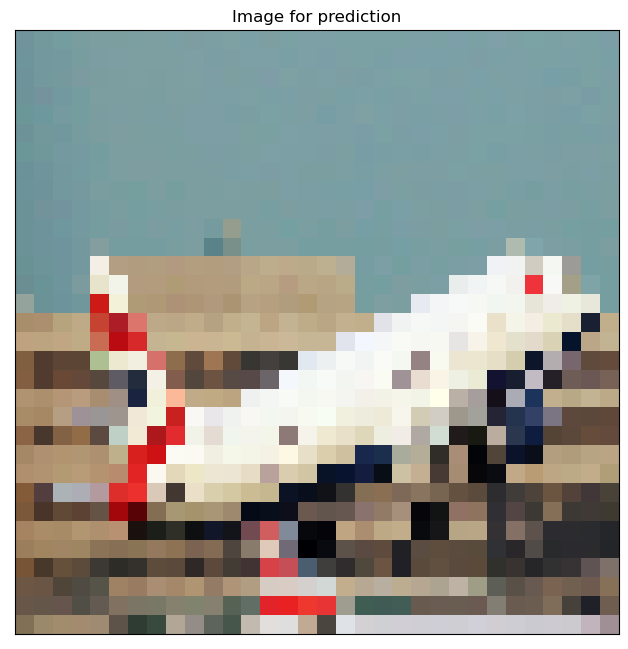

In [57]:
#loading the image for prediction
test_img =image.load_img('test.jpg',target_size =(32,32))

#Loading basic CNN model
model = load_model('basic_cifar10_cnn.h5')

#Loading modified CNN model
model_modified = load_model('modified_cifar10_cnn.h5')

#Prediction using Modified model
print("Prediction by Base CNN :",predict_image(test_img,model))

#Prediction using Modified model
print("Prediction by Modified CNN :",predict_image(test_img,model_modified))